# Finance chart analysis: Stock market vs. Crypto

We want to compare the trend of stock prices vs. crypto currencies. 
It is often said, that crypto currencies are not strongly bound to the finance markets. 
This would have the benefit that investors can buy both values to have a better diversification.

We will try these comparison approaches:
- visual comparison
- corellation by month
- correlation in total


# Part 1: Visual comparison of stock prices vs. crypto

## Warm up: Show some stock prices from 2021-2023

From Yahoo Finance we can download stock prices just by using the stock symbols (e.g. AAPL for Apple).

We then plot these using seaborn

[*********************100%%**********************]  4 of 4 completed


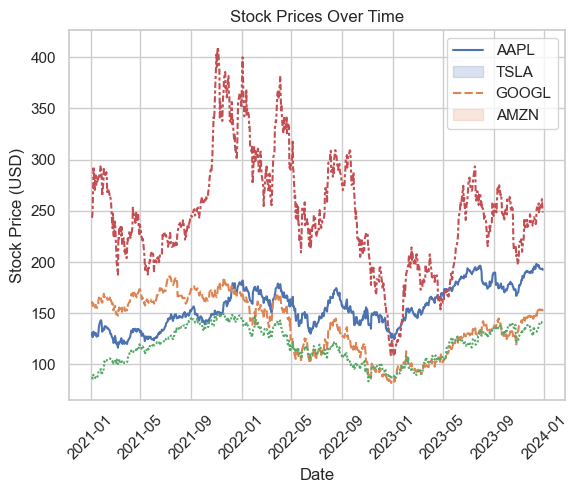

In [57]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt  # Importing Matplotlib's pyplot module for showing the plot

# Define the list of stock symbols
stock_symbols = ['AAPL', 'TSLA', 'GOOGL', 'AMZN']

# Fetch the stock data using yfinance
stock_data = yf.download(stock_symbols, start='2021-01-01', end='2023-12-31')

# Plot using seaborn
sns.set(style='whitegrid')
sns.lineplot(data=stock_data['Close'])

# Use plt.show() from Matplotlib to display the plot
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend(stock_symbols)
plt.grid(True)
plt.show()



## Compare ETH with MSCI World Index

We now visually compare Ethereum with the MSCI World Index.

Result: We cannot really see trends, because the values are too different.

[*********************100%%**********************]  2 of 2 completed


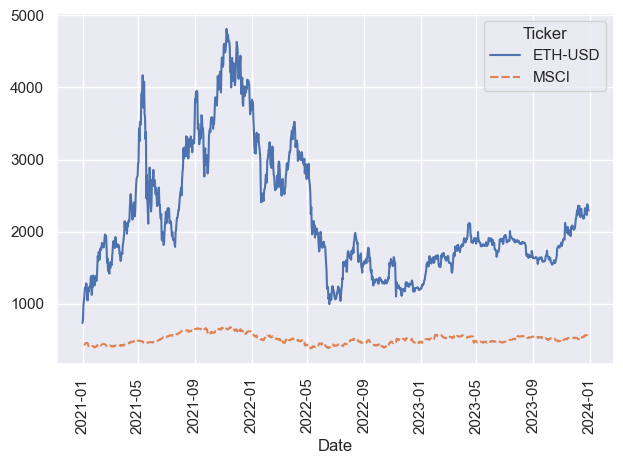

In [58]:
# get crypto data for ETH and MSCI World and plot using seaborn. make date axis cleaner
crypto_symbols = ['ETH-USD', 'MSCI']
crypto_data = yf.download(crypto_symbols, start='2021-01-01', end='2023-12-31')

# Plot the crypto data using seaborn
sns.set(style='darkgrid')
sns.lineplot(data=crypto_data['Close'])

# Clean up the date axis
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Part 2: Correlate MSCI World Index vs. ETH

We try these approaches:
- rolling correlation
- monthly correlation
- total correlation

## Rolling correlation

We now try a rolling correlation, to compare day-wise using a rolling window of 30 days

Result: We see time phases, where there is correlation but also many non-correlated phases. This approach does not show the correlation clearly.

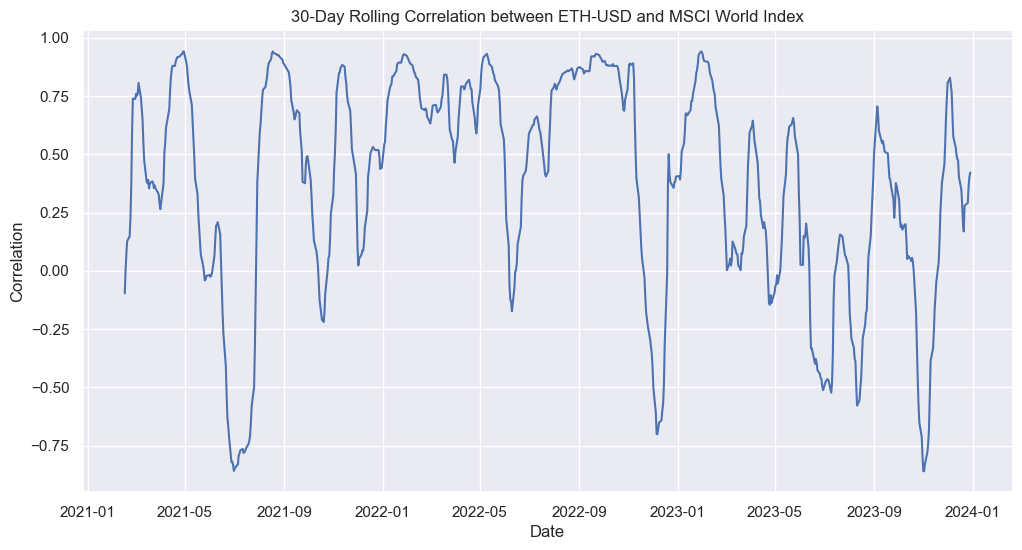

In [70]:
# show rolling corelation between ETH and MSCI

# Assuming crypto_data is a DataFrame with Date as index and 'Close' as a MultiIndex
eth_prices = crypto_data['Close']['ETH-USD']
msci_prices = crypto_data['Close']['MSCI']

# Ensure both series are aligned by reindexing or dropping NaNs
aligned_data = pd.concat([eth_prices, msci_prices], axis=1).dropna()
aligned_data.columns = ['ETH-USD', 'MSCI']

# Calculate the rolling correlation with a 30-day window
rolling_correlation = aligned_data['ETH-USD'].rolling(window=30).corr(aligned_data['MSCI'])

# Plotting the rolling correlation
plt.figure(figsize=(12, 6))
sns.lineplot(data=rolling_correlation)
plt.title('30-Day Rolling Correlation between ETH-USD and MSCI World Index')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

## Monthly correlation

Now we will calculate the correlation month by month.

Result: We can now see, in which months the development of the MSCI World Index correlates with the ETH price.

/var/folders/8w/2xsgvpjj6ml6fzj2rlkxf0j40000gn/T/ipykernel_61868/59553643.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_correlation = aligned_data.resample('M').apply(lambda x: x['ETH-USD'].corr(x['MSCI']))


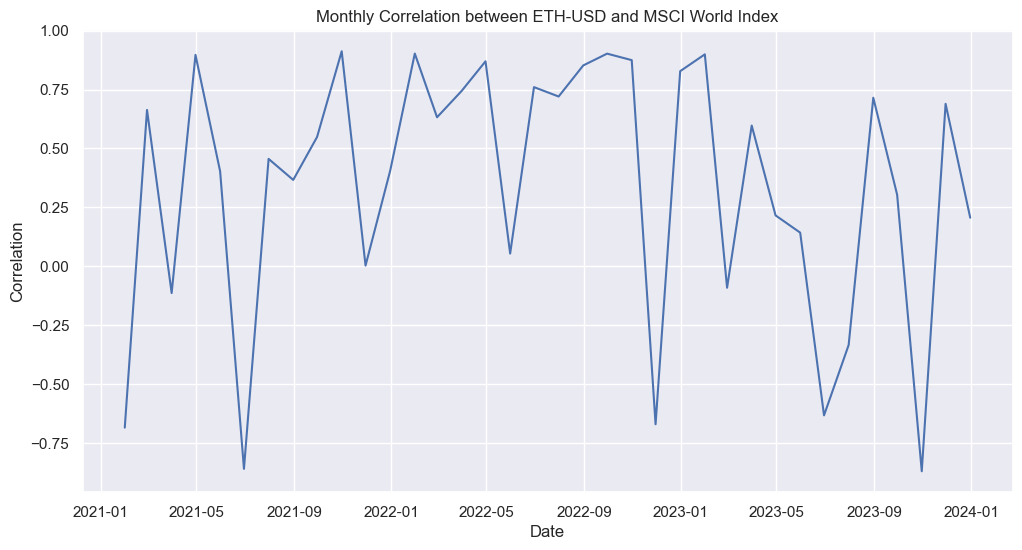

In [68]:
# show corellation between ETH and MSCI, by month, in a line plot from 2021-2023
# Assuming crypto_data is a DataFrame with Date as index and 'Close' as a MultiIndex
import pandas as pd

eth_prices = crypto_data['Close']['ETH-USD']
msci_prices = crypto_data['Close']['MSCI']

# Ensure both series are aligned by reindexing or dropping NaNs
aligned_data = pd.concat([eth_prices, msci_prices], axis=1).dropna()
aligned_data.columns = ['ETH-USD', 'MSCI']

# Calculate the monthly correlation
monthly_correlation = aligned_data.resample('M').apply(lambda x: x['ETH-USD'].corr(x['MSCI']))

# Plotting the monthly correlation
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_correlation)
plt.title('Monthly Correlation between ETH-USD and MSCI World Index')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()



## Total correlation by coefficient

We now look at some statistics, to see the mean correlation by month.

Result: No correlation (0.3) in total. In month-by-month comparison, there are only 44% of months, where we have a strong positive correlation (=larger than 60%)

In [69]:
# show stats of how good the correlation is by month.

mean_correlation = monthly_correlation.mean()
std_correlation = monthly_correlation.std()
print(f"Mean Monthly Correlation: {mean_correlation}")
print(f"Standard Deviation of Monthly Correlation: {std_correlation}")

# add number of months with positive correlation higher than 60%, in percentag
positive_correlation = monthly_correlation[monthly_correlation > 0.6]
percentage_positive = len(positive_correlation) / len(monthly_correlation) * 100
print(f"Percentage of Months with Positive Correlation > 60%: {percentage_positive:.2f}%")


Mean Monthly Correlation: 0.3423135234322708
Standard Deviation of Monthly Correlation: 0.5537314715494817
Percentage of Months with Positive Correlation > 60%: 44.44%
